In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline  

In [77]:
data=pd.read_csv(r"E:\workspace\spam.csv",encoding='latin-1')
print(data.head(10))

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   
5  spam  FreeMsg Hey there darling it's been 3 week's n...        NaN   
6   ham  Even my brother is not like to speak with me. ...        NaN   
7   ham  As per your request 'Melle Melle (Oru Minnamin...        NaN   
8  spam  WINNER!! As a valued network customer you have...        NaN   
9  spam  Had your mobile 11 months or more? U R entitle...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
5        NaN        NaN  
6        NaN  

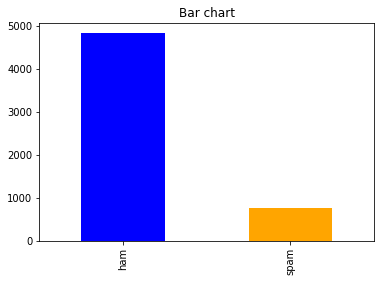

In [78]:
count_Class=pd.value_counts(data["v1"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

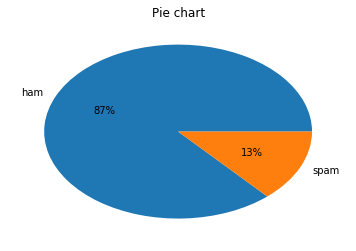

In [79]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

In [80]:
count1 = Counter(" ".join(data[data['v1']=='ham']["v2"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(data[data['v1']=='spam']["v2"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})


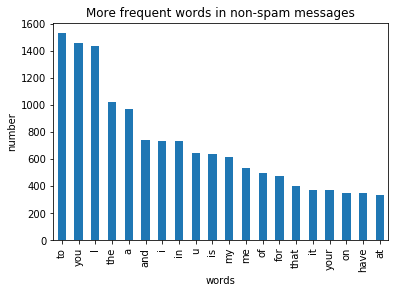

In [81]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()


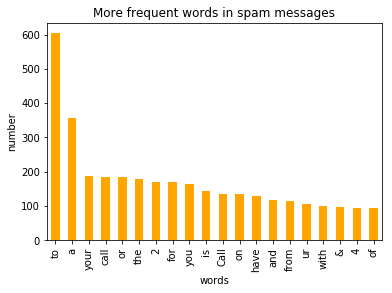

In [82]:
df2.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()


In [142]:
f = feature_extraction.text.CountVectorizer(stop_words = 'english')
X = f.fit_transform(data["v2"])
np.shape(X)

(5572, 8404)

In [143]:
data["v1"]=data["v1"].map({'spam':1,'ham':0})
print(data)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, data['v1'], test_size=0.33, random_state=42)
print([np.shape(X_train), np.shape(X_test)])

      v1                                                 v2 Unnamed: 2  \
0    NaN  Go until jurong point, crazy.. Available only ...        NaN   
1    NaN                      Ok lar... Joking wif u oni...        NaN   
2    NaN  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3    NaN  U dun say so early hor... U c already then say...        NaN   
4    NaN  Nah I don't think he goes to usf, he lives aro...        NaN   
5    NaN  FreeMsg Hey there darling it's been 3 week's n...        NaN   
6    NaN  Even my brother is not like to speak with me. ...        NaN   
7    NaN  As per your request 'Melle Melle (Oru Minnamin...        NaN   
8    NaN  WINNER!! As a valued network customer you have...        NaN   
9    NaN  Had your mobile 11 months or more? U R entitle...        NaN   
10   NaN  I'm gonna be home soon and i don't want to tal...        NaN   
11   NaN  SIX chances to win CASH! From 100 to 20,000 po...        NaN   
12   NaN  URGENT! You have won a 1 wee

In [85]:
#
list_alpha = np.arange(1/100000, 20, 0.11)
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0
for alpha in list_alpha:
    bayes = naive_bayes.MultinomialNB(alpha=alpha)
    bayes.fit(X_train, y_train)
    score_train[count] = bayes.score(X_train, y_train)
    score_test[count]= bayes.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    count = count + 1 

In [55]:
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,0.0,0.0,0.0,0.0
1,0.11001,0.0,0.0,0.0,0.0
2,0.22001,0.0,0.0,0.0,0.0
3,0.33001,0.0,0.0,0.0,0.0
4,0.44001,0.0,0.0,0.0,0.0
5,0.55001,0.0,0.0,0.0,0.0
6,0.66001,0.0,0.0,0.0,0.0
7,0.77001,0.0,0.0,0.0,0.0
8,0.88001,0.0,0.0,0.0,0.0
9,0.99001,0.0,0.0,0.0,0.0


In [17]:
best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]

alpha             15.730010
Train Accuracy     0.979641
Test Accuracy      0.969549
Test Recall        0.777778
Test Precision     1.000000
Name: 143, dtype: float64

In [18]:
models[models['Test Precision']==1].head(n=5)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
143,15.73001,0.979641,0.969549,0.777778,1.0
144,15.84001,0.979641,0.969549,0.777778,1.0
145,15.95001,0.979641,0.969549,0.777778,1.0
146,16.06001,0.979373,0.969549,0.777778,1.0
147,16.17001,0.979373,0.969549,0.777778,1.0


In [19]:
best_index = models[models['Test Precision']==1]['Test Accuracy'].idxmax()
bayes = naive_bayes.MultinomialNB(alpha=list_alpha[best_index])
bayes.fit(X_train, y_train)
models.iloc[best_index, :]

alpha             15.730010
Train Accuracy     0.979641
Test Accuracy      0.969549
Test Recall        0.777778
Test Precision     1.000000
Name: 143, dtype: float64

In [20]:
m_confusion_test = metrics.confusion_matrix(y_test, bayes.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,1587,0
Actual 1,56,196


In [21]:
list_C = np.arange(500, 2000, 100) #100000
score_train = np.zeros(len(list_C))
score_test = np.zeros(len(list_C))
recall_test = np.zeros(len(list_C))
precision_test= np.zeros(len(list_C))
count = 0
for C in list_C:
    svc = svm.SVC(C=C)
    svc.fit(X_train, y_train)
    score_train[count] = svc.score(X_train, y_train)
    score_test[count]= svc.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, svc.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, svc.predict(X_test))
    count = count + 1 

In [22]:
matrix = np.matrix(np.c_[list_C, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['C', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,C,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,500.0,0.994910,0.982599,0.873016,1.0
1,600.0,0.995982,0.982599,0.873016,1.0
2,700.0,0.996785,0.982599,0.873016,1.0
3,800.0,0.997053,0.983143,0.876984,1.0
4,900.0,0.997589,0.983143,0.876984,1.0
5,1000.0,0.998125,0.983143,0.876984,1.0
6,1100.0,0.998928,0.983143,0.876984,1.0
7,1200.0,0.999732,0.983143,0.876984,1.0
8,1300.0,1.000000,0.983143,0.876984,1.0
9,1400.0,1.000000,0.983143,0.876984,1.0


In [23]:
best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]

C                 500.000000
Train Accuracy      0.994910
Test Accuracy       0.982599
Test Recall         0.873016
Test Precision      1.000000
Name: 0, dtype: float64

In [24]:
models[models['Test Precision']==1].head(n=5)

,C,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,500.0,0.994910,0.982599,0.873016,1.0
1,600.0,0.995982,0.982599,0.873016,1.0
2,700.0,0.996785,0.982599,0.873016,1.0
3,800.0,0.997053,0.983143,0.876984,1.0
4,900.0,0.997589,0.983143,0.876984,1.0


In [25]:
best_index = models[models['Test Precision']==1]['Test Accuracy'].idxmax()
svc = svm.SVC(C=list_C[best_index])
svc.fit(X_train, y_train)
models.iloc[best_index, :]

C                 800.000000
Train Accuracy      0.997053
Test Accuracy       0.983143
Test Recall         0.876984
Test Precision      1.000000
Name: 3, dtype: float64

In [26]:
m_confusion_test = metrics.confusion_matrix(y_test, svc.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,1587,0
Actual 1,31,221


In [144]:
from sklearn.feature_extraction import DictVectorizer
from keras.models import load_model


mytest=("Mobile no. has won 500000 ")
Y = [mytest]#mytest is a new email in string format
f = feature_extraction.text.CountVectorizer(stop_words = 'english')

f.fit(data["v2"]) # fittingf

X = f.transform(Y)
res=bayes.predict(X)
print(res)

[1]
